In [1]:
from generate_dataset import Dataset

dataset = Dataset.from_json("dataset.json")

# Filtering

In [2]:
# Possible
total_possible_boards = 3**9

# Reacheable
total_reacheable_boards = len(dataset.boards)

# Unique
unique_symmetry_groups = set(board.category.symmetry_group for board in dataset.boards.values())
total_unique_boards = len(unique_symmetry_groups)

# Decidable
decidable_symmetry_groups = set(
    board.category.symmetry_group
    for board in dataset.boards.values()
    if board.category.choice_complexity[0] != 0
)
total_decidable_boards = len(decidable_symmetry_groups)

# Print the results
print(f"{total_possible_boards}: Total number of possible boards")
print(f"{total_reacheable_boards}: Total number of boards in dataset")
print(f"{total_unique_boards}: Number of unique symmetry groups")
print(f"{total_decidable_boards}: Number of decidable unique symmetry groups")


19683: Total number of possible boards
5478: Total number of boards in dataset
765: Number of unique symmetry groups
431: Number of decidable unique symmetry groups


In [3]:
filtered_boards = []
for symmetry_group in decidable_symmetry_groups:
    # Get the first board from the symmetry group
    first_string = symmetry_group.split('|')[0]
    filtered_boards.append(dataset.boards[first_string])

print(f"Number of filtered boards: {len(filtered_boards)}")
print(f"Type of elements in filtered_boards: {type(filtered_boards[0])}")

Number of filtered boards: 431
Type of elements in filtered_boards: <class 'generate_dataset.Board'>


# Ranking

### Choice Complexity

In [9]:
from fractions import Fraction

# Count unique decidable boards grouped by chance_complexity ratio
chance_complexity_ratio_counts = {}

for board in filtered_boards:
    ratio = Fraction(board.category.choice_complexity[0], board.category.choice_complexity[1])
    if ratio not in chance_complexity_ratio_counts:
        chance_complexity_ratio_counts[ratio] = 0
    chance_complexity_ratio_counts[ratio] += 1

# Sort the dictionary by chance_complexity ratio
sorted_chance_complexity_ratio_counts = dict(sorted(chance_complexity_ratio_counts.items()))

sorted_chance_complexity_ratio_counts


{Fraction(1, 7): 2,
 Fraction(1, 5): 13,
 Fraction(1, 4): 6,
 Fraction(1, 3): 44,
 Fraction(2, 5): 13,
 Fraction(3, 7): 1,
 Fraction(1, 2): 93,
 Fraction(4, 7): 3,
 Fraction(3, 5): 19,
 Fraction(2, 3): 99,
 Fraction(5, 7): 2,
 Fraction(3, 4): 72,
 Fraction(4, 5): 46,
 Fraction(5, 6): 16,
 Fraction(6, 7): 1,
 Fraction(7, 8): 1}

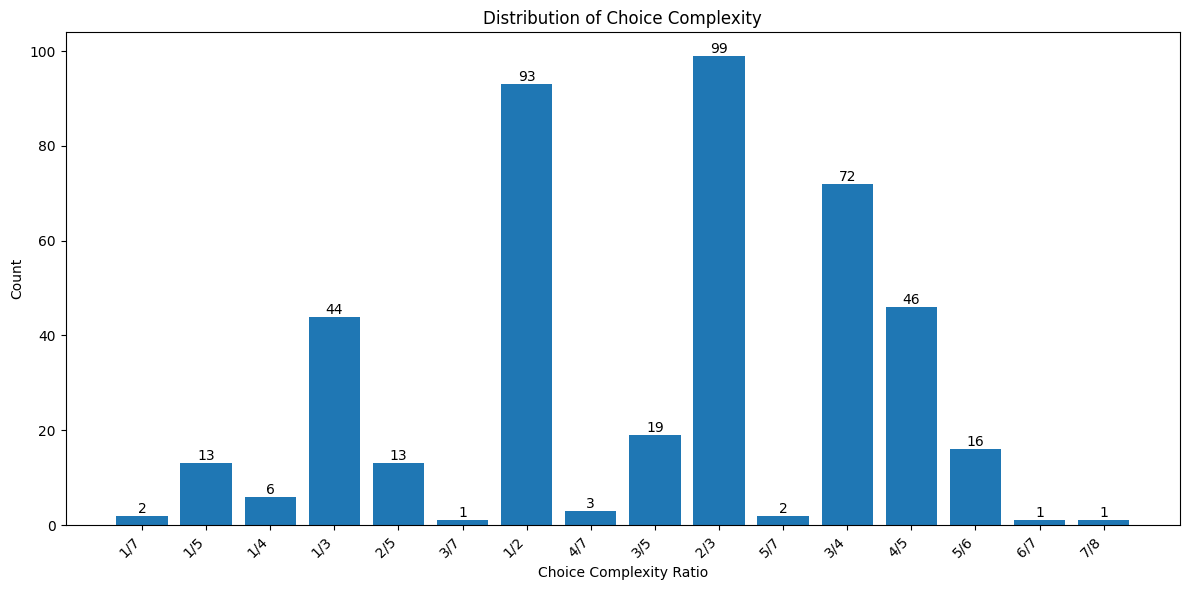

In [14]:
import matplotlib.pyplot as plt

# Convert Fraction keys to strings for better readability
choice_complexity_ratios = [str(ratio) for ratio in sorted_chance_complexity_ratio_counts.keys()]
counts = list(sorted_chance_complexity_ratio_counts.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(choice_complexity_ratios, counts)
plt.xlabel('Choice Complexity Ratio')
plt.ylabel('Count')
plt.title('Distribution of Choice Complexity')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Depth Complexity

In [8]:
# Count unique decidable boards grouped by depth_complexity
depth_complexity_counts = {}

for board in filtered_boards:
    depth = board.category.depth_complexity
    if depth not in depth_complexity_counts:
        depth_complexity_counts[depth] = 0
    depth_complexity_counts[depth] += 1

# Sort the dictionary by depth_complexity
sorted_depth_complexity_counts = dict(sorted(depth_complexity_counts.items()))

sorted_depth_complexity_counts

{1: 252, 2: 79, 3: 51, 4: 24, 5: 17, 6: 8}

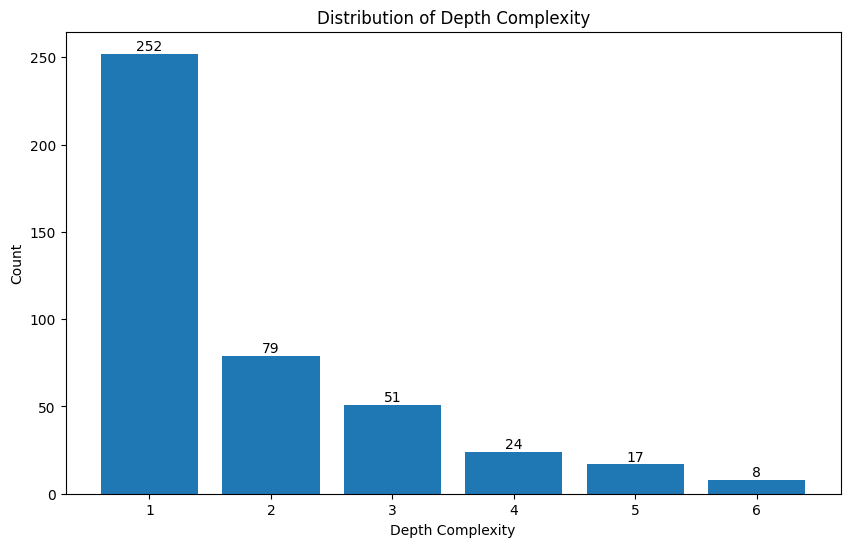

In [11]:
import matplotlib.pyplot as plt

depths = list(sorted_depth_complexity_counts.keys())
counts = list(sorted_depth_complexity_counts.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(depths, counts)
plt.xlabel('Depth Complexity')
plt.ylabel('Count')
plt.title('Distribution of Depth Complexity')
plt.xticks(depths)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()

# Examples

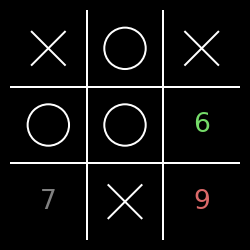

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from IPython.display import display

def display_tictactoe(board, size=230, moves_scores=None):
    # Setup
    fig, ax = plt.subplots(figsize=(size/100, size/100), dpi=100, facecolor='black')
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.axis('off')
    
    # Style
    bg_color = 'black'
    line_color = 'white'
    number_color = 'gray'
    line_width = size / 160
    
    # Grid
    for i in range(1, 3):
        ax.axhline(y=i, color=line_color, linewidth=line_width)
        ax.axvline(x=i, color=line_color, linewidth=line_width)
    
    # Symbols and scores
    for i, mark in enumerate(board):
        x, y = i % 3 + 0.5, 2 - (i // 3) + 0.5
        a = 0.8
        b = 0.27
        if mark == 'X':
            ax.plot([x-b*a, x+b*a], [y-b*a, y+b*a], color=line_color, linewidth=line_width)
            ax.plot([x-b*a, x+b*a], [y+b*a, y-b*a], color=line_color, linewidth=line_width)
        elif mark == 'O':
            ax.add_artist(Circle((x, y), b, fill=False, color=line_color, linewidth=line_width))
        else:
            if moves_scores:
                score = next((score for move, score in moves_scores if move == mark), None)
                if score is not None:
                    if score == 1:
                        color = '#75db69'
                    elif score == -1:
                        color = '#db6969'
                    else:
                        color = 'gray'
                else:
                    color = number_color
            else:
                color = number_color
            ax.text(x, y, str(mark), ha='center', va='center', color=color, fontsize=size/12)
    
    # Display
    plt.tight_layout(pad=0)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    display(fig)
    plt.close()

# Example usage
board = ['X', 'O', 'X', 'O', 'O', 6, 7, 'X', 9]
moves_scores = [(6, 1), (7, 0), (9, -1)]
display_tictactoe(board, moves_scores=moves_scores)

In [ ]:
# Manually adjustable index
depth_complexity_index = 1  # Change this to select different depth complexities

# Get the list of symmetry groups for the selected depth complexity
symmetry_groups = set()
for board in dataset.boards.values():
    if board.category.depth_complexity == depth_complexity_index:
        symmetry_groups.add(board.category.symmetry_group)

print(f"Depth Complexity: {depth_complexity_index}")
print(f"Number of Symmetry Groups: {len(symmetry_groups)}")

# Calculate choice complexity ratio and sort symmetry groups
symmetry_group_choice_ratios = []
for symmetry_group in symmetry_groups:
    for board in dataset.boards.values():
        if board.category.depth_complexity == depth_complexity_index and board.category.symmetry_group == symmetry_group:
            choice_complexity = board.category.choice_complexity
            choice_ratio = choice_complexity[0] / choice_complexity[1]
            symmetry_group_choice_ratios.append((symmetry_group, choice_ratio))
            break

# Sort symmetry groups by choice ratio (highest first)
sorted_symmetry_groups = [sg for sg, _ in sorted(symmetry_group_choice_ratios, key=lambda x: x[1], reverse=True)]

# Display the first board of the top 20 symmetry groups in the given depth_complexity, ordered by choice ratio (highest first)
for symmetry_group in sorted_symmetry_groups[:20]:
    print(f"\nSymmetry Group: {symmetry_group}")
    for board_hash, board in dataset.boards.items():
        if board.category.depth_complexity == depth_complexity_index and board.category.symmetry_group == symmetry_group:
            move_score_pairs = [(score.move, score.value) for score in board.scores if score.move is not None]
            choice_ratio = board.category.choice_complexity[0] / board.category.choice_complexity[1]
            print(f"Choice Ratio: {choice_ratio:.2f}")
            display_tictactoe(board.state, size=200, moves_scores=move_score_pairs)
            break  # Display only the first board of each symmetry group


Board: XOXOXOX89
Depth Complexity: 0
Choice Complexity: (0, 1)


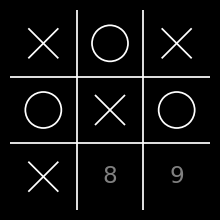


Board: 123456789
Depth Complexity: 0
Choice Complexity: (0, 9)


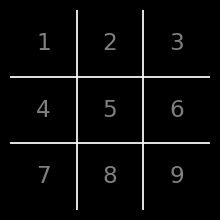


Board: 1234XOX8O
Depth Complexity: 1
Choice Complexity: (4, 5)


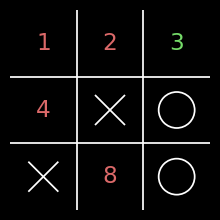


Board: 123OXXO89
Depth Complexity: 2
Choice Complexity: (4, 5)


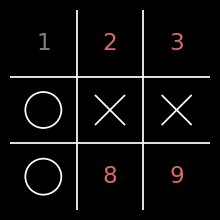


Board: 12O456XOX
Depth Complexity: 3
Choice Complexity: (4, 5)


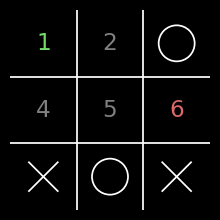


Board: X234O678X
Depth Complexity: 4
Choice Complexity: (2, 6)


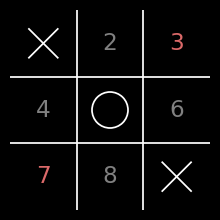


Board: 12345XO89
Depth Complexity: 5
Choice Complexity: (6, 7)


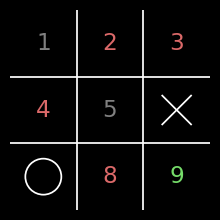


Board: 123O5X7X9
Depth Complexity: 6
Choice Complexity: (4, 6)


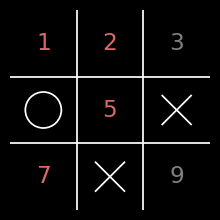

In [32]:
examples = [
    (0, "XOXOXOX89"),
    (0, "123456789"),
    (1, "1234XOX8O"),
    (2, "123OXXO89"),
    (3, "12O456XOX"),
    (4, "X234O678X"),
    (5, "12345XO89"),
    (6, "123O5X7X9")
]

for depth, board_hash in examples:
    board = dataset.boards[board_hash]
    print(f"\nBoard: {board_hash}")
    print(f"Depth Complexity: {board.category.depth_complexity}")
    print(f"Choice Complexity: {board.category.choice_complexity}")
    move_score_pairs = [(score.move, score.value) for score in board.scores if score.move is not None]
    display_tictactoe(board.state, size=200, moves_scores=move_score_pairs)

# Sample

In [6]:
from generate_dataset import Dataset

dataset = Dataset.from_json("dataset.json")

def get_filtered_boards(dataset):
    # Get unique, decidable symmetry groups
    decidable_symmetry_groups = set(
        board.category.symmetry_group
        for board in dataset.boards.values()
        if board.category.choice_complexity[0] != 0
    )
    
    # Filter boards
    filtered_boards = []
    for symmetry_group in decidable_symmetry_groups:
        # Get the first board from the symmetry group
        first_string = symmetry_group.split('|')[0]
        filtered_boards.append(dataset.boards[first_string])
    
    return filtered_boards

# Get filtered boards
filtered_boards = get_filtered_boards(dataset)
print(f"Number of filtered boards: {len(filtered_boards)}")


Number of filtered boards: 431


Number of filtered boards after removing threat patterns: 68
Number of removed boards with threat patterns: 363

Removed boards:
Board: 12O456XX9
Choice Complexity: (5, 6)
Depth Complexity: 5


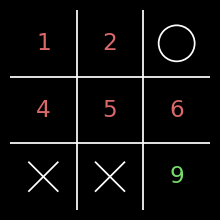

---
Board: 1OOXOXXX9
Choice Complexity: (1, 2)
Depth Complexity: 1


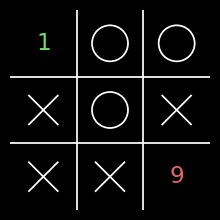

---
Board: 123O5X7OX
Choice Complexity: (2, 5)
Depth Complexity: 1


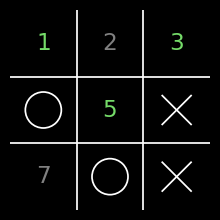

---
Board: 123OOXXOX
Choice Complexity: (2, 3)
Depth Complexity: 1


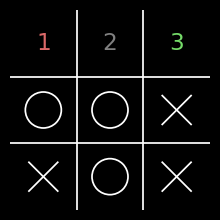

---
Board: 1OOX5X7X9
Choice Complexity: (2, 4)
Depth Complexity: 1


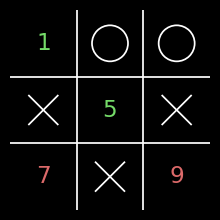

---


In [7]:
from typing import List
from generate_dataset import Board


def get_highest_scoring_moves(board: Board) -> List[int]:
    highest_score = max(score.value for score in board.scores if score.move is not None)
    return [score.move for score in board.scores if score.move is not None and score.value == highest_score]

def get_lines_with_moves(moves: List[int]) -> List[List[int]]:
    winning_lines = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Rows
        [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Columns
        [0, 4, 8], [2, 4, 6]  # Diagonals
    ]
    return [line for line in winning_lines if any(move - 1 in line for move in moves)]

def has_threat_pattern(board: Board, lines: List[List[int]]) -> bool:
    for line in lines:
        marks = [board.state[i] for i in line]
        if marks.count('X') == 2 or marks.count('O') == 2:
            return True
    return False

def filter_non_threat_boards(boards: List[Board]) -> List[Board]:
    non_threat_boards = []
    removed_boards = []
    for board in boards:
        highest_scoring_moves = get_highest_scoring_moves(board)
        lines_with_moves = get_lines_with_moves(highest_scoring_moves)
        if not has_threat_pattern(board, lines_with_moves):
            non_threat_boards.append(board)
        else:
            removed_boards.append(board)
    return non_threat_boards, removed_boards

# Filter out boards with threat patterns
filtered_boards, removed_boards = filter_non_threat_boards(filtered_boards)
print(f"Number of filtered boards after removing threat patterns: {len(filtered_boards)}")
print(f"Number of removed boards with threat patterns: {len(removed_boards)}")

print("\nRemoved boards:")
for board in removed_boards[:5]:
    print(f"Board: {Board.hash_board(board.state)}")
    print(f"Choice Complexity: {board.category.choice_complexity}")
    print(f"Depth Complexity: {board.category.depth_complexity}")
    move_score_pairs = [(score.move, score.value) for score in board.scores if score.move is not None]
    display_tictactoe(board.state, size=200, moves_scores=move_score_pairs)
    print("---")


Number of boards after removing those with center as highest scoring move: 42
Number of removed boards with center as highest scoring move: 26

Removed boards with center as highest scoring move:
Board: 1OXX567XO
Choice Complexity: (2, 4)
Depth Complexity: 4


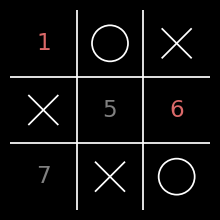

---
Board: 1234567X9
Choice Complexity: (4, 8)
Depth Complexity: 6


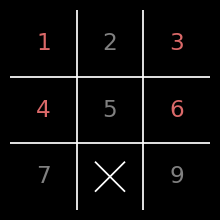

---
Board: 12345OX89
Choice Complexity: (4, 7)
Depth Complexity: 5


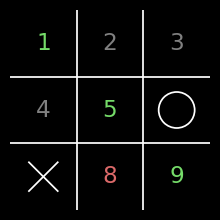

---
Board: 12O45XX89
Choice Complexity: (3, 6)
Depth Complexity: 6


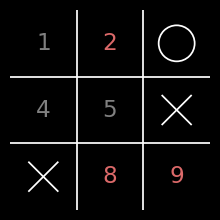

---
Board: 12345O7X9
Choice Complexity: (5, 7)
Depth Complexity: 5


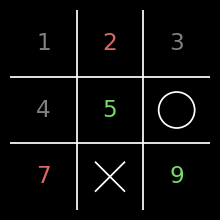

---


In [8]:
# Filter out boards where one of the highest scoring moves is the center move
center_move_boards = []
non_center_move_boards = []

for board in filtered_boards:
    highest_scoring_moves = get_highest_scoring_moves(board)
    if 5 in highest_scoring_moves:  # 5 represents the center move (1-indexed)
        center_move_boards.append(board)
    else:
        non_center_move_boards.append(board)

filtered_boards = non_center_move_boards

print(f"Number of boards after removing those with center as highest scoring move: {len(filtered_boards)}")
print(f"Number of removed boards with center as highest scoring move: {len(center_move_boards)}")

print("\nRemoved boards with center as highest scoring move:")
for board in center_move_boards[:5]:
    print(f"Board: {Board.hash_board(board.state)}")
    print(f"Choice Complexity: {board.category.choice_complexity}")
    print(f"Depth Complexity: {board.category.depth_complexity}")
    move_score_pairs = [(score.move, score.value) for score in board.scores if score.move is not None]
    display_tictactoe(board.state, size=200, moves_scores=move_score_pairs)
    print("---")


Total number of selected boards: 50

First 5 selected boards:

1. Board: 12345XO89
   Choice Complexity: (6, 7) (ratio: 0.86)
   Depth Complexity: 5


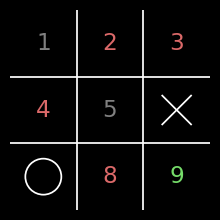

---

2. Board: 12345XOX9
   Choice Complexity: (5, 6) (ratio: 0.83)
   Depth Complexity: 5


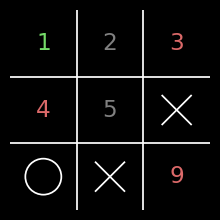

---

3. Board: 12OX5678X
   Choice Complexity: (5, 6) (ratio: 0.83)
   Depth Complexity: 4


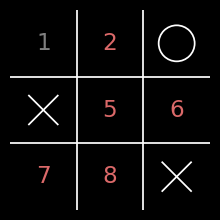

---

4. Board: 123OOX7X9
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


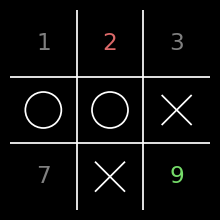

---

5. Board: 1O3O5X7X9
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


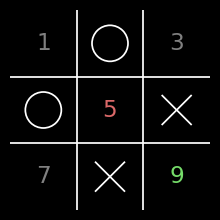

---

6. Board: 12O45XXO9
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


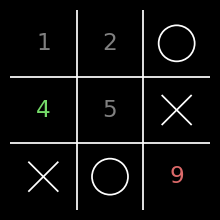

---

7. Board: 12O456XOX
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


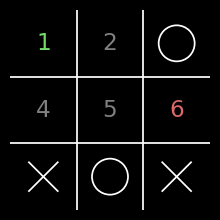

---

8. Board: 123OOXX89
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


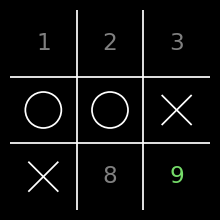

---

9. Board: 12O45XX8O
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


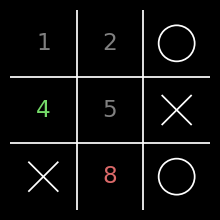

---

10. Board: 123O5XXO9
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


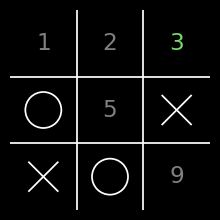

---

11. Board: 1OXX5O7X9
   Choice Complexity: (3, 4) (ratio: 0.75)
   Depth Complexity: 4


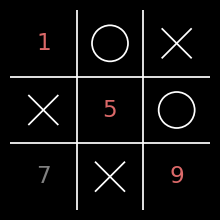

---

12. Board: 12O45XXXO
   Choice Complexity: (3, 4) (ratio: 0.75)
   Depth Complexity: 3


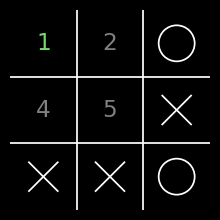

---

13. Board: 12O45XXOX
   Choice Complexity: (3, 4) (ratio: 0.75)
   Depth Complexity: 3


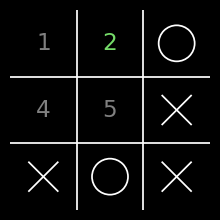

---

14. Board: 1O3OXX7X9
   Choice Complexity: (3, 4) (ratio: 0.75)
   Depth Complexity: 3


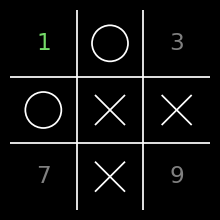

---

15. Board: 12XO5X7XO
   Choice Complexity: (3, 4) (ratio: 0.75)
   Depth Complexity: 3


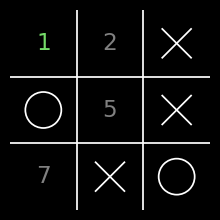

---

16. Board: 12O456X89
   Choice Complexity: (5, 7) (ratio: 0.71)
   Depth Complexity: 5


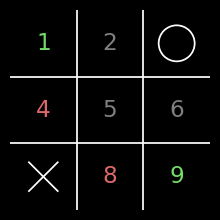

---

17. Board: 123O5X7X9
   Choice Complexity: (4, 6) (ratio: 0.67)
   Depth Complexity: 6


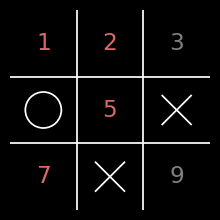

---

18. Board: 123456OXX
   Choice Complexity: (4, 6) (ratio: 0.67)
   Depth Complexity: 5


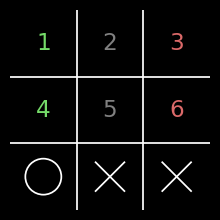

---

19. Board: 12OX567X9
   Choice Complexity: (4, 6) (ratio: 0.67)
   Depth Complexity: 5


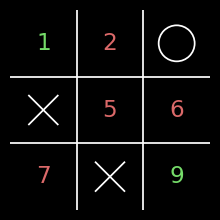

---

20. Board: 123O5XX89
   Choice Complexity: (4, 6) (ratio: 0.67)
   Depth Complexity: 4


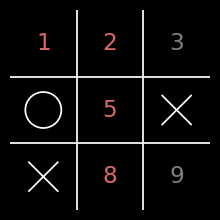

---

21. Board: 12O4X6X89
   Choice Complexity: (4, 6) (ratio: 0.67)
   Depth Complexity: 4


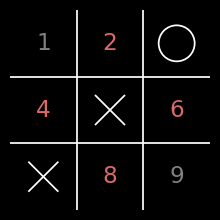

---

22. Board: 1OXXOO7X9
   Choice Complexity: (2, 3) (ratio: 0.67)
   Depth Complexity: 3


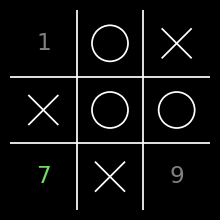

---

23. Board: 12XX5OOXO
   Choice Complexity: (2, 3) (ratio: 0.67)
   Depth Complexity: 3


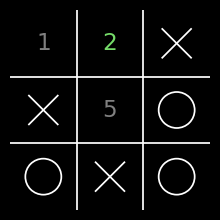

---

24. Board: 1OXX5O7XO
   Choice Complexity: (2, 3) (ratio: 0.67)
   Depth Complexity: 3


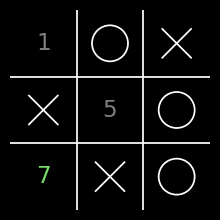

---

25. Board: 12XX5OOOX
   Choice Complexity: (2, 3) (ratio: 0.67)
   Depth Complexity: 3


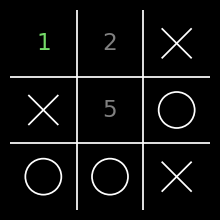

---

26. Board: 12OO5X78X
   Choice Complexity: (3, 5) (ratio: 0.60)
   Depth Complexity: 4


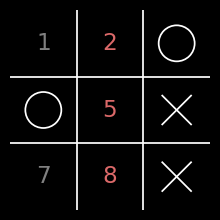

---

27. Board: 12XX5O7O9
   Choice Complexity: (3, 5) (ratio: 0.60)
   Depth Complexity: 3


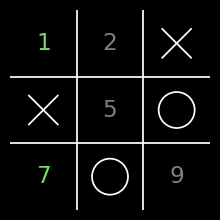

---

28. Board: 123OXX7O9
   Choice Complexity: (3, 5) (ratio: 0.60)
   Depth Complexity: 3


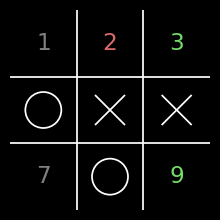

---

29. Board: 12O4X6XO9
   Choice Complexity: (3, 5) (ratio: 0.60)
   Depth Complexity: 3


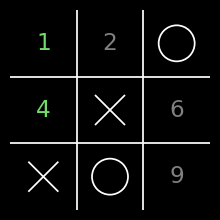

---

30. Board: 123456O8X
   Choice Complexity: (4, 7) (ratio: 0.57)
   Depth Complexity: 5


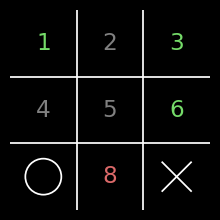

---

31. Board: 1234X6789
   Choice Complexity: (4, 8) (ratio: 0.50)
   Depth Complexity: 6


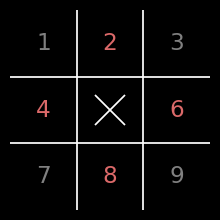

---

32. Board: 12XXOO7X9
   Choice Complexity: (2, 4) (ratio: 0.50)
   Depth Complexity: 4


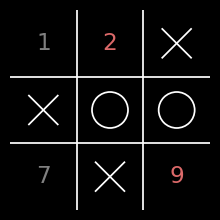

---

33. Board: 1234OX7X9
   Choice Complexity: (3, 6) (ratio: 0.50)
   Depth Complexity: 4


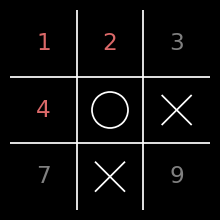

---

34. Board: 1O3XOX7X9
   Choice Complexity: (2, 4) (ratio: 0.50)
   Depth Complexity: 3


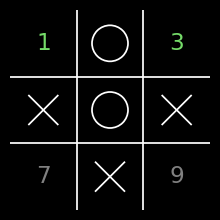

---

35. Board: 123OXX789
   Choice Complexity: (2, 6) (ratio: 0.33)
   Depth Complexity: 4


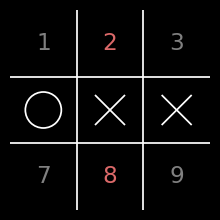

---

36. Board: 1234OXX89
   Choice Complexity: (2, 6) (ratio: 0.33)
   Depth Complexity: 4


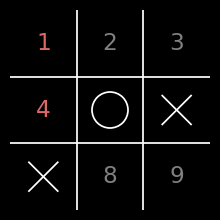

---

37. Board: 12X4O6X89
   Choice Complexity: (2, 6) (ratio: 0.33)
   Depth Complexity: 4


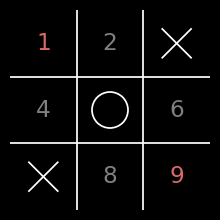

---

38. Board: 12O4OXX89
   Choice Complexity: (1, 5) (ratio: 0.20)
   Depth Complexity: 4


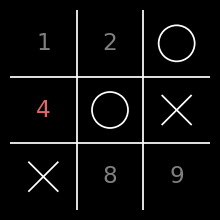

---

39. Board: 123OXX78O
   Choice Complexity: (1, 5) (ratio: 0.20)
   Depth Complexity: 4


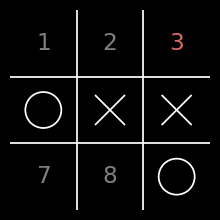

---

40. Board: 12OX5O78X
   Choice Complexity: (1, 5) (ratio: 0.20)
   Depth Complexity: 3


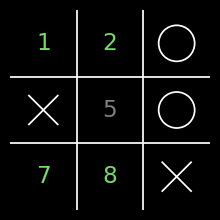

---

41. Board: 1234O67X9
   Choice Complexity: (1, 7) (ratio: 0.14)
   Depth Complexity: 6


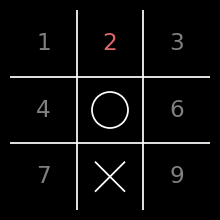

---

42. Board: 1234X67O9
   Choice Complexity: (1, 7) (ratio: 0.14)
   Depth Complexity: 5


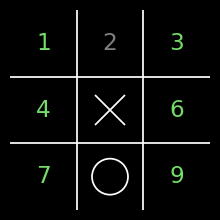

---

43. Board: 12345678X
   Choice Complexity: (7, 8) (ratio: 0.88)
   Depth Complexity: 6


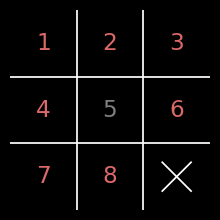

---

44. Board: 12XO567X9
   Choice Complexity: (5, 6) (ratio: 0.83)
   Depth Complexity: 6


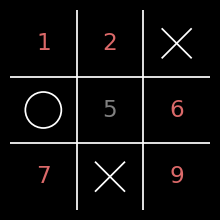

---

45. Board: 123456XOX
   Choice Complexity: (5, 6) (ratio: 0.83)
   Depth Complexity: 4


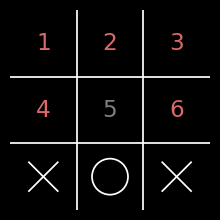

---

46. Board: 12345XXO9
   Choice Complexity: (5, 6) (ratio: 0.83)
   Depth Complexity: 4


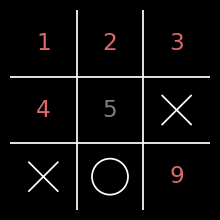

---

47. Board: 12345XOXO
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


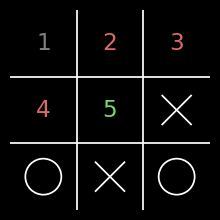

---

48. Board: 12345OOXX
   Choice Complexity: (4, 5) (ratio: 0.80)
   Depth Complexity: 3


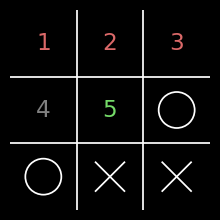

---

49. Board: 12345O7X9
   Choice Complexity: (5, 7) (ratio: 0.71)
   Depth Complexity: 5


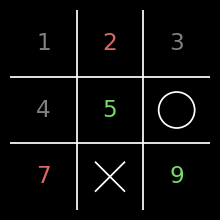

---

50. Board: 12345XX8O
   Choice Complexity: (4, 6) (ratio: 0.67)
   Depth Complexity: 4


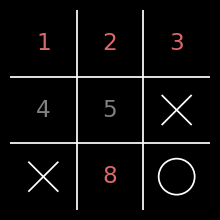

---


In [9]:
sorted_boards = sorted(
    filtered_boards,
    key=lambda board: (
        board.category.choice_complexity[0] / board.category.choice_complexity[1],
        board.category.depth_complexity
    ),
    reverse=True
)

sorted_center_move_boards = sorted(
    center_move_boards,
    key=lambda board: (
        board.category.choice_complexity[0] / board.category.choice_complexity[1],
        board.category.depth_complexity
    ),
    reverse=True
)


# Define the number of boards to select
N = 50  # You can adjust this value as needed

# Create a new list of selected boards
selected_boards = []

# Add boards from sorted_boards
for board in sorted_boards:
    selected_boards.append(board)
    if len(selected_boards) >= N:
        break

# If we haven't reached N, add boards from sorted_center_move_boards
if len(selected_boards) < N:
    for board in sorted_center_move_boards:
        if board not in selected_boards:
            selected_boards.append(board)
            if len(selected_boards) >= N:
                break

print(f"Total number of selected boards: {len(selected_boards)}")

# Print information about the selected boards and display them
print("\nFirst 5 selected boards:")
for i, board in enumerate(selected_boards, 1):
    choice_ratio = board.category.choice_complexity[0] / board.category.choice_complexity[1]
    print(f"\n{i}. Board: {Board.hash_board(board.state)}")
    print(f"   Choice Complexity: {board.category.choice_complexity} (ratio: {choice_ratio:.2f})")
    print(f"   Depth Complexity: {board.category.depth_complexity}")
    
    # Display the board using display_tictactoe
    move_score_pairs = [(score.move, score.value) for score in board.scores if score.move is not None]
    display_tictactoe(board.state, size=200, moves_scores=move_score_pairs)
    print("---")


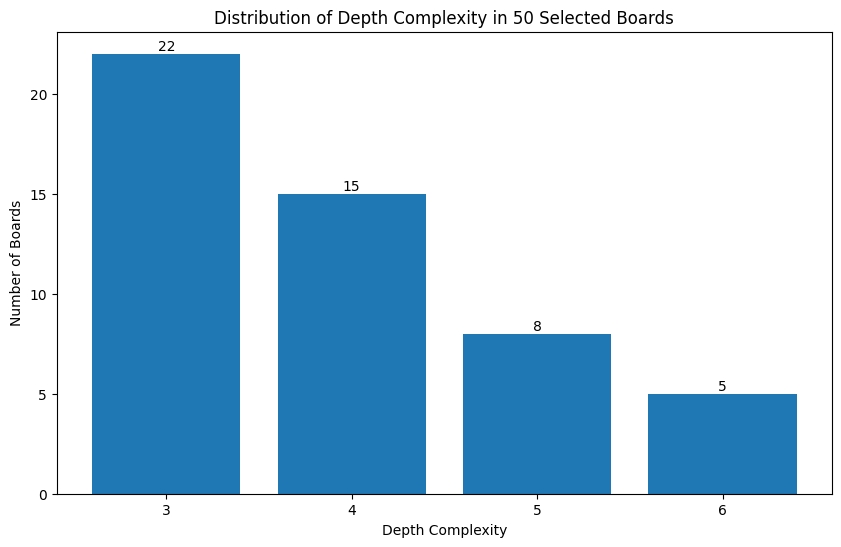

In [21]:
# Define the top N variable
top_n = len(selected_boards)  # Use all selected boards

def count_depth_complexity(boards):
    # Count the occurrences of each depth complexity
    depth_complexity_counts = {}
    for board in boards:
        depth = board.category.depth_complexity
        depth_complexity_counts[depth] = depth_complexity_counts.get(depth, 0) + 1
    
    return depth_complexity_counts

# Count depth complexity for selected boards
depth_counts = count_depth_complexity(selected_boards)

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(list(depth_counts.keys()), list(depth_counts.values()))
plt.xlabel('Depth Complexity')
plt.ylabel('Number of Boards')
plt.title(f'Distribution of Depth Complexity in {top_n} Selected Boards')
plt.xticks(list(depth_counts.keys()))  # Set x-axis ticks to integer values

# Add the numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()


In [17]:
# Create a dictionary with hash values as keys and Board objects as values
selected_boards_dict = {Board.hash_board(board.state): board for board in selected_boards}

# Create a new Dataset object with the selected boards
dataset_top50 = Dataset(boards=selected_boards_dict)

# Save the new dataset to a JSON file
dataset_top50.to_json("dataset_top50.json")

print(f"Created a new dataset with {len(selected_boards)} boards and saved it to 'dataset_top50.json'")


Created a new dataset with 50 boards and saved it to 'dataset_top50.json'
